In [1]:
# l# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv("Churn_Modelling.csv")
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2984,2985,15694946,Hanson,663,France,Male,35,9,0.00,2,1,1,195580.28,0
7352,7353,15809800,Korovina,726,France,Female,38,4,0.00,2,0,0,6787.48,0
6699,6700,15809999,Gordon,709,France,Female,41,3,150300.65,2,1,0,71672.86,0
3481,3482,15644686,Kennedy,729,Spain,Female,34,9,53299.96,2,1,1,42855.97,0
4528,4529,15624995,McCane,714,Spain,Female,31,6,152926.60,1,1,1,50899.91,0
7968,7969,15712068,Wan,592,Spain,Male,45,8,84692.50,1,0,1,67214.02,0


## **No 1**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.shape

(10000, 14)

In [4]:
df.duplicated().any()

False

In [5]:
df[df.duplicated(keep=False)==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
#melihat apakah terdapat kolom kosong atau tidak pada dataset
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#melihat tipe data pada dataset
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
numericals = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categoricals = ['Geography','Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
objek=['Geography','Gender']

In [10]:
df[objek].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


pertanyaan
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) 


jawaban 


1.   Semua tipe data yang tersedia pada dataset sudah sesuai 
2.   Pada dataset tidak ada nilai kosong
3.   Dari data set yang tersedia tidak terdapat nilai aneh pada nilai min/mean/median/max/unique/top/freq

## **No 2**

In [11]:
list(enumerate(numericals))

[(0, 'CreditScore'),
 (1, 'Age'),
 (2, 'Tenure'),
 (3, 'Balance'),
 (4, 'NumOfProducts'),
 (5, 'EstimatedSalary')]

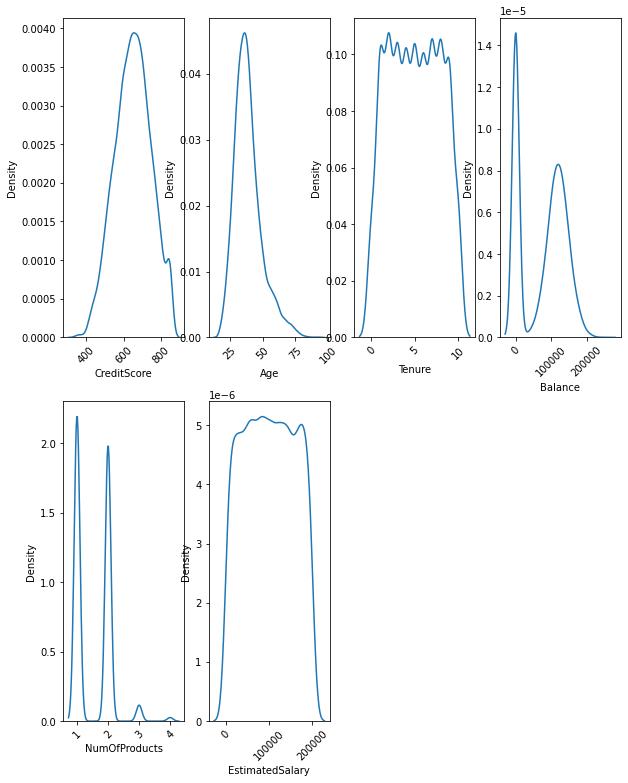

In [12]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.kdeplot(i[1], data=df)
    plt.xticks(rotation=45)

Berdasarkan hasil distribusi diatas: 
- Features EstimatedSalary, CreditScore, dan tenure sudah termasuk kedalam distribusi normal, 
- features age terdistribusi positif karena terdapat ketimpangan usia yaitu dengan nilai usia tertinggi 92 tahun sedangkan rata-rata usia terletak di 32 tahun, untuk menanggulangi hal tersebut di data pre-processing dapat menggunakan normalisasi data
- Features Numofproducts dapat termasuk kedalam categorical yaitu dengan nilai tertinggi yaitu 1 dan 2 yang artinya jumlah produk yang dibeli pelanggan terbanyak yaitu membeli 1 atau 2 produk
- Features balance juga terdistribusi bimodal positif skew karena terdapat juga ketimpangan data dengan nilai 0 mendominasi, untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya normalisasi data, standartlisasi data, atau Log transformation 
- Dilihat dari data distribusi tersebut, mayoritas features datanya homogen/runtun

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

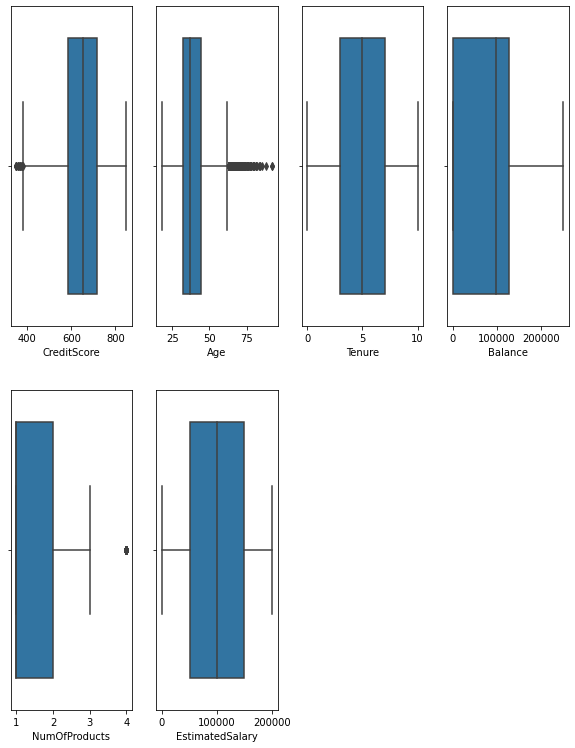

In [13]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(i[1], data=df)

- Berdasarkan hasil boxplot diatas dapat disimpulkan bahwa terdapat features yang terdapat outlier yaitu pada features creaditscore, age, dan numofproduct karena terdapat data yang ekstrem kebawah atau keatas untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya menghapus oulier berdasarkan IQR atau Z-score
- Features yang akan menjadi perhatian khusus yakni pada features CrediteScore dan Age mengingat jarak outliernya cukup jauh dari rata-ratanya.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

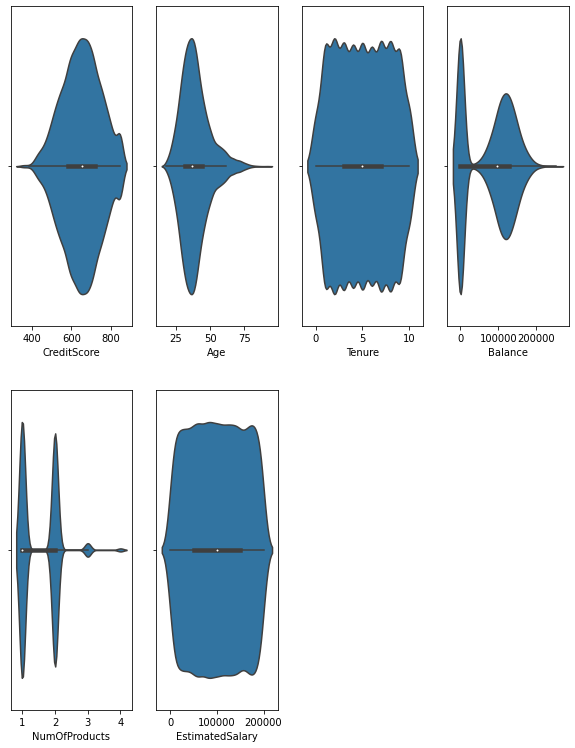

In [14]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.violinplot(i[1], data=df)

Berdasarkan hasil violin plot diatas dapat dilihat apa yang dideskripsikan pada boxplot maupun displot sesuai.

> Indented block


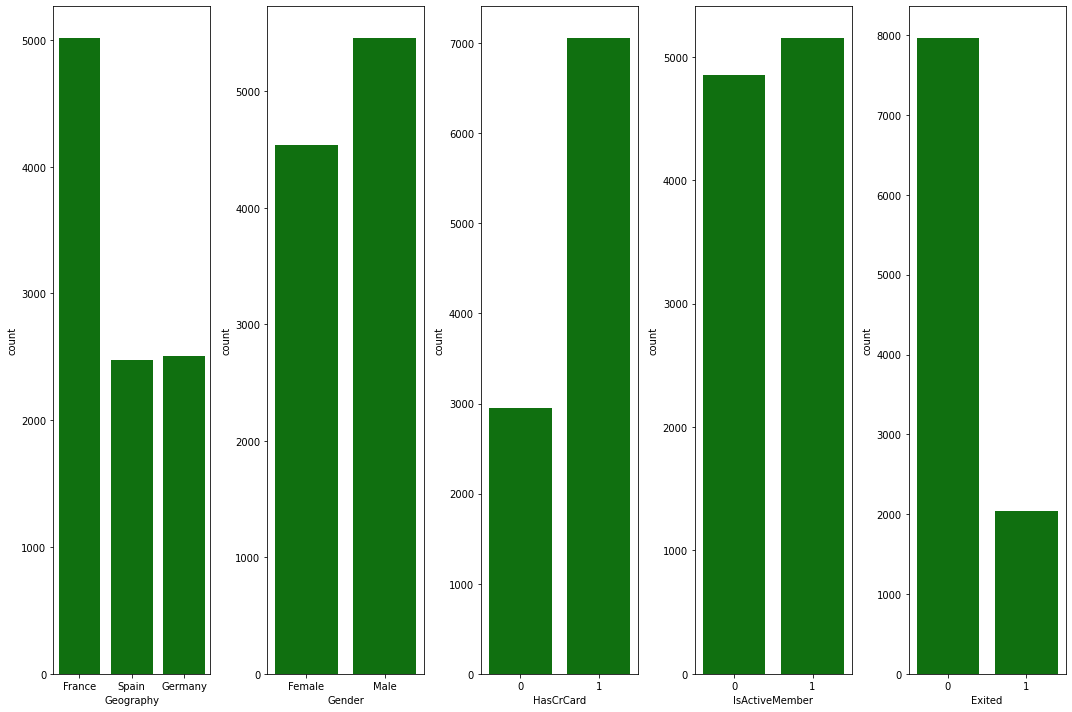

In [15]:
plt.figure(figsize = (15,10))
for i in range(0, len(categoricals)):
   plt.subplot(1, len(categoricals), i+1)
   sns.countplot(x=df[categoricals[i]], color='green')
   plt.tight_layout()

Berdasarkan hasil countplot 
- Kategori diatas menjelaskan bahwa terdapat ketimpangan jumlah pengguna berdasarkan features geography yaitu jumlah pengguna France lebih banyak dibandingkan spain dan germany.
- Features HasCrCard yang menunjukkan bahwa nasabah yang memiliki kartu kredit lebih banyak dibandingkan dengan yang tidak memiliki kartu kredit.
- Pada features exited, dapat disimpulkan bahwa nasabah pada bank tersebut mayoritas tidak churn dibandingkan dengan yang churn, untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya Class imbalance.
- Features gender dan IsActiveMember memiliki nilai yang tidak begitu timpang

## **No 3**

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan?
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Ap

In [16]:
df = pd.read_csv("Churn_Modelling.csv")

In [17]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


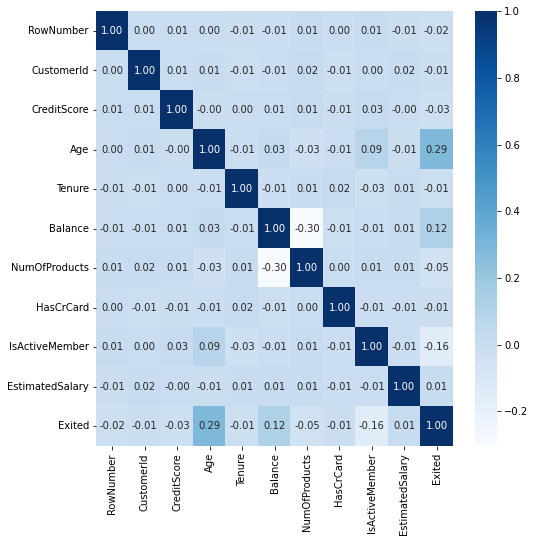

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

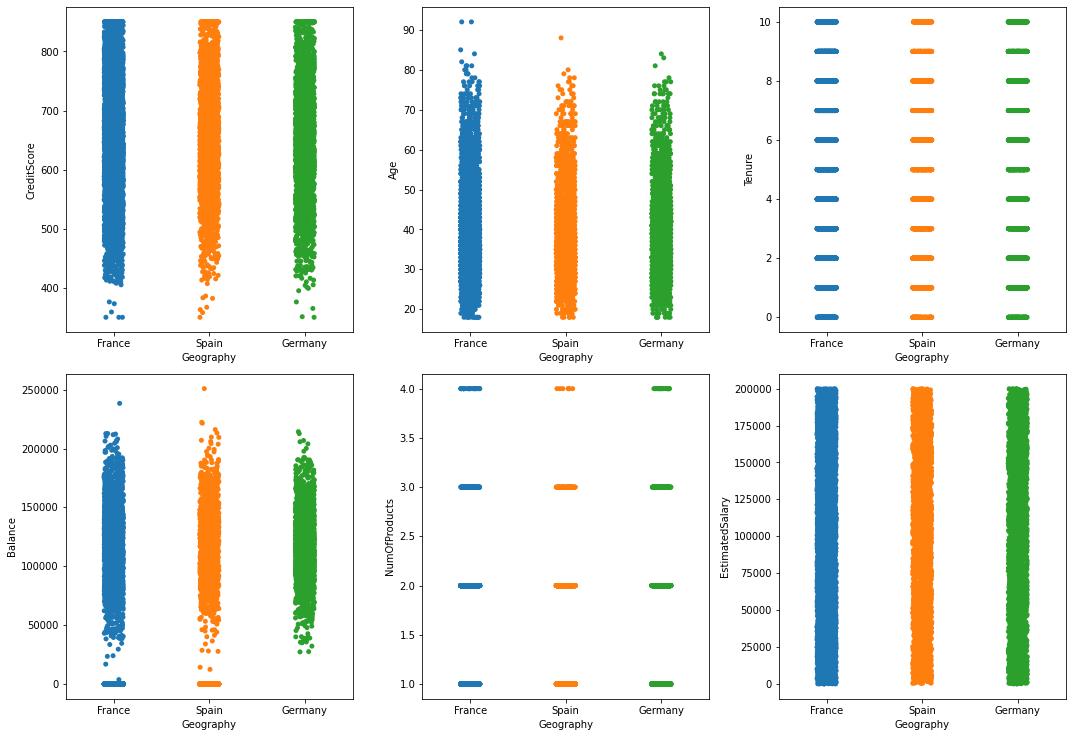

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Geography', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

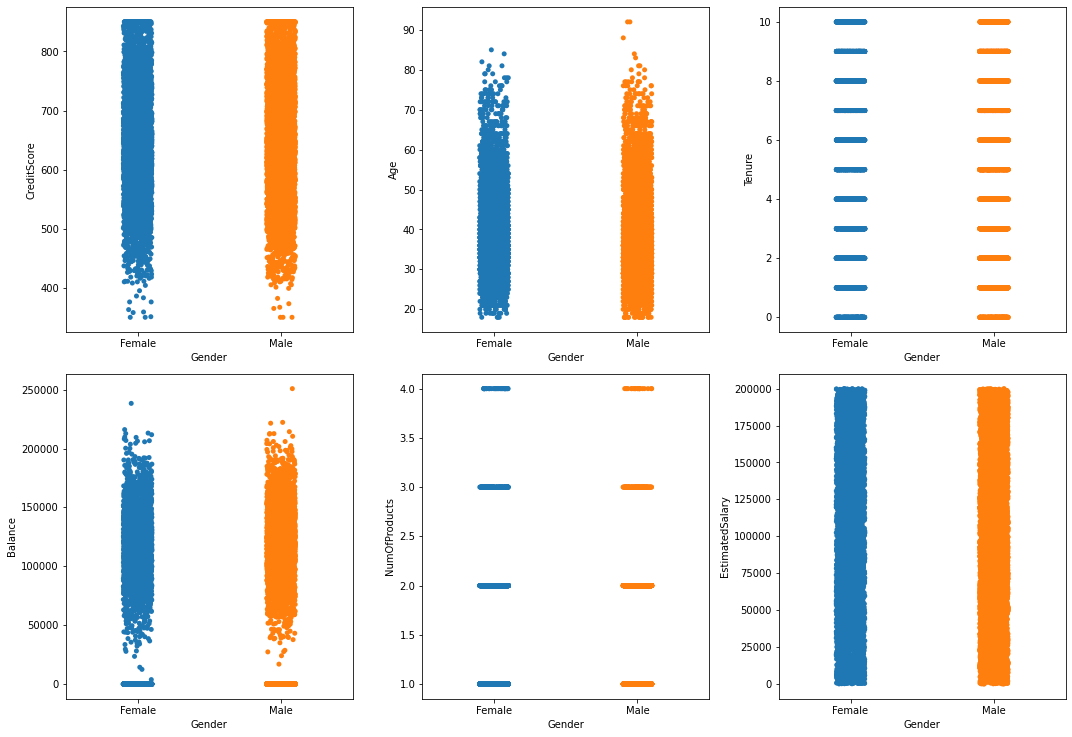

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

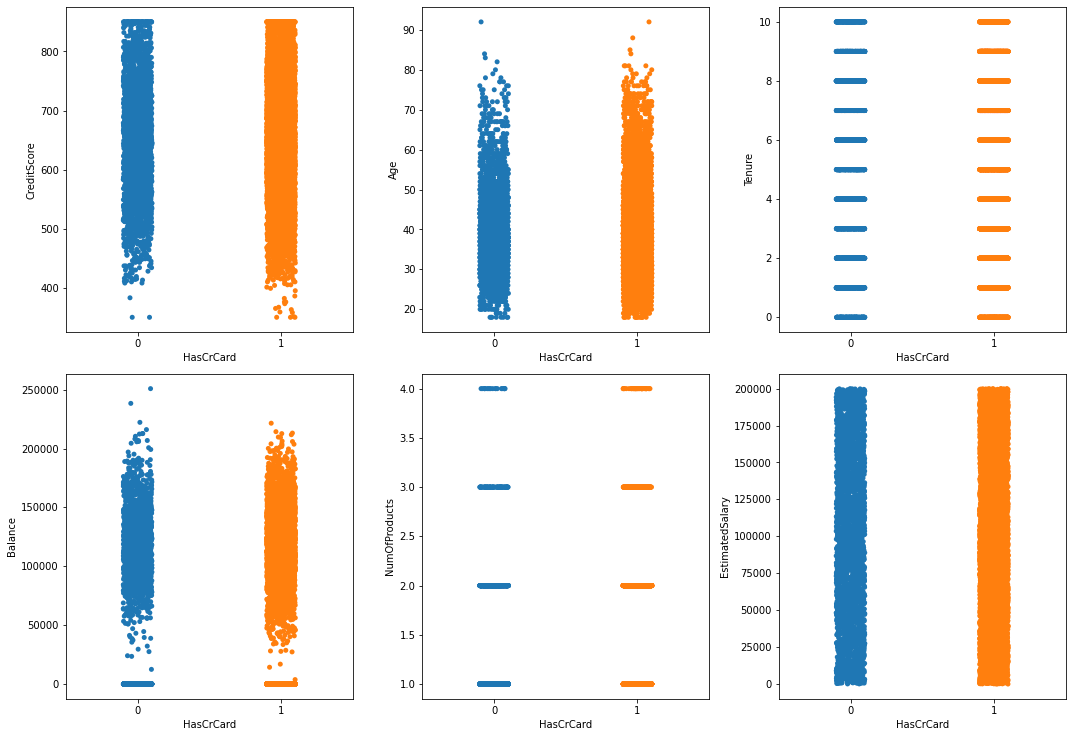

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='HasCrCard', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

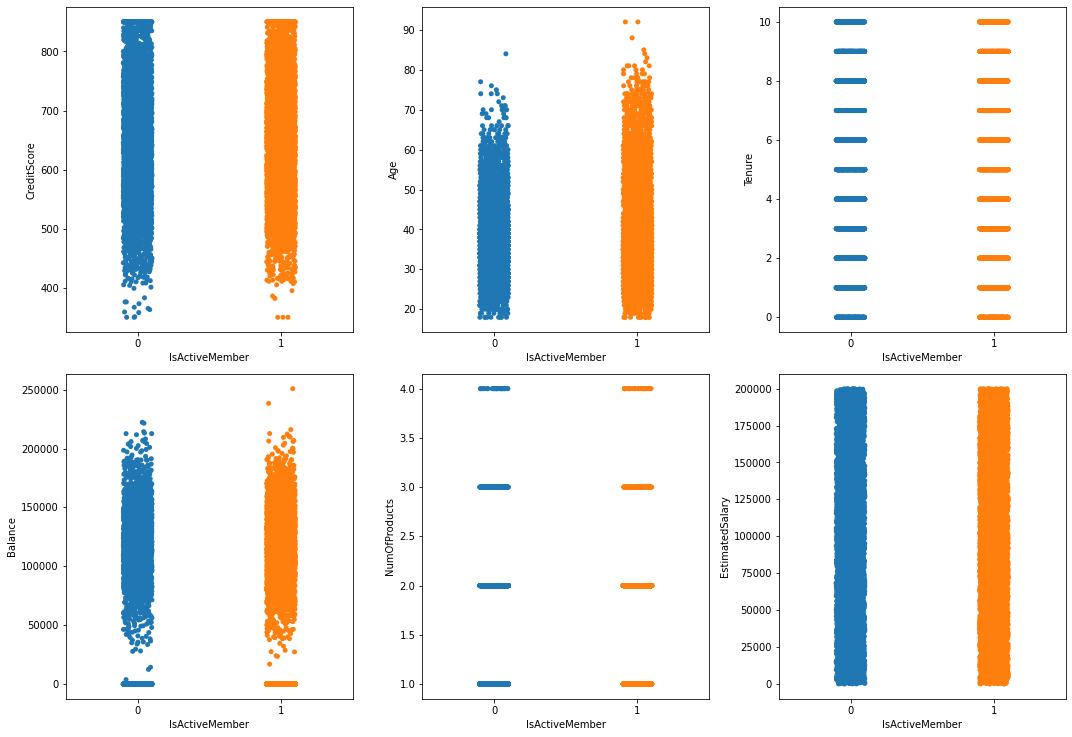

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='IsActiveMember', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

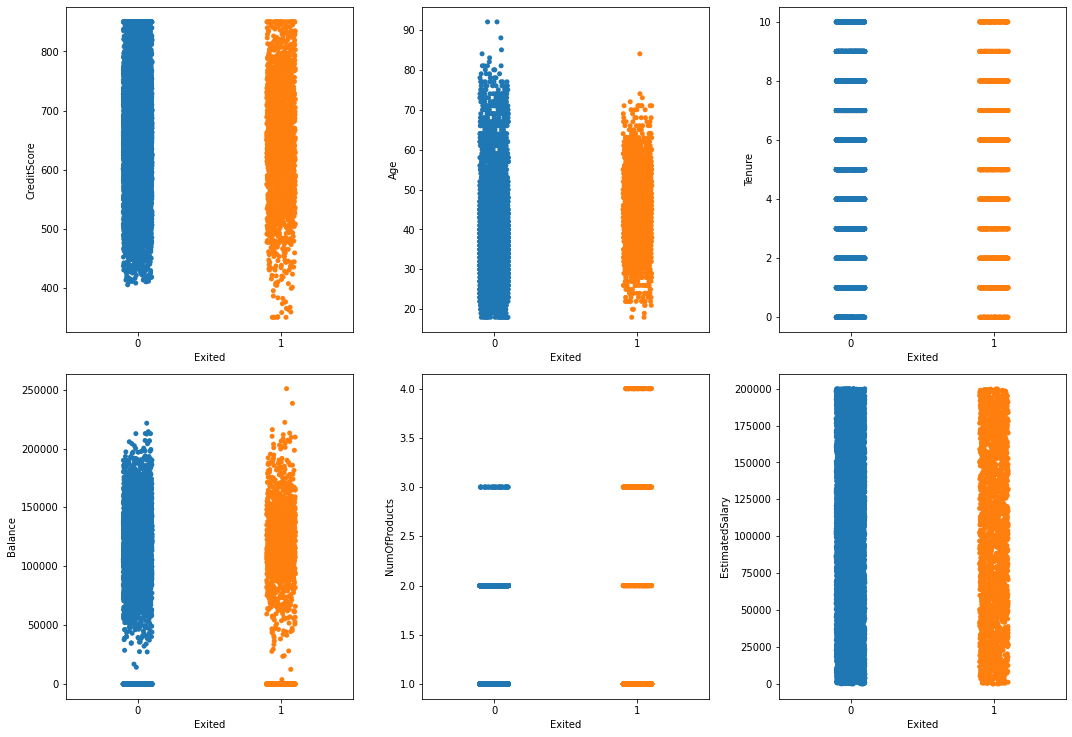

In [25]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Exited', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

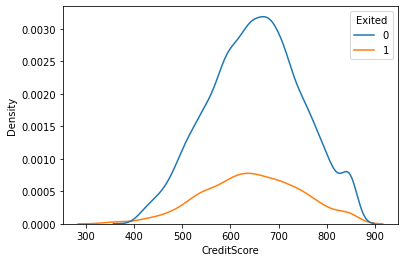

In [26]:
sns.kdeplot(data=df, x="CreditScore", hue="Exited")

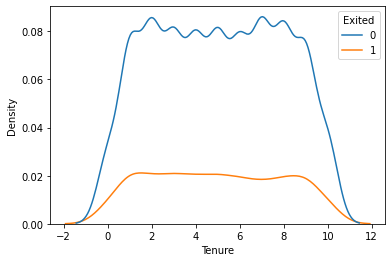

In [27]:
sns.kdeplot(data=df, x="Tenure", hue="Exited")

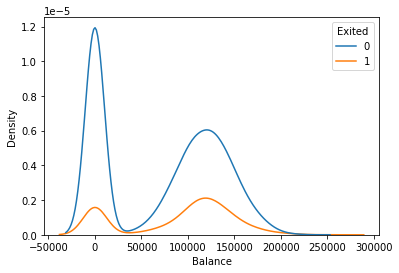

In [28]:
sns.kdeplot(data=df, x="Balance", hue="Exited")

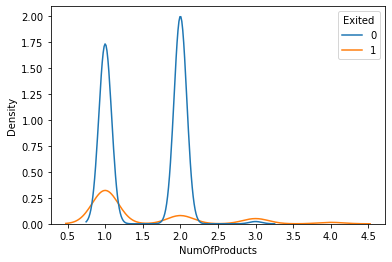

In [29]:
sns.kdeplot(data=df, x="NumOfProducts", hue="Exited")

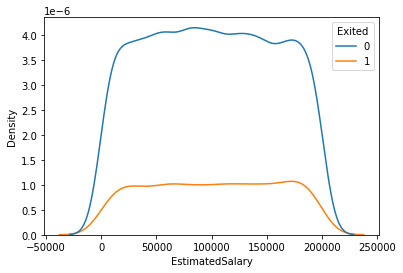

In [30]:
sns.kdeplot(data=df, x="EstimatedSalary", hue="Exited")

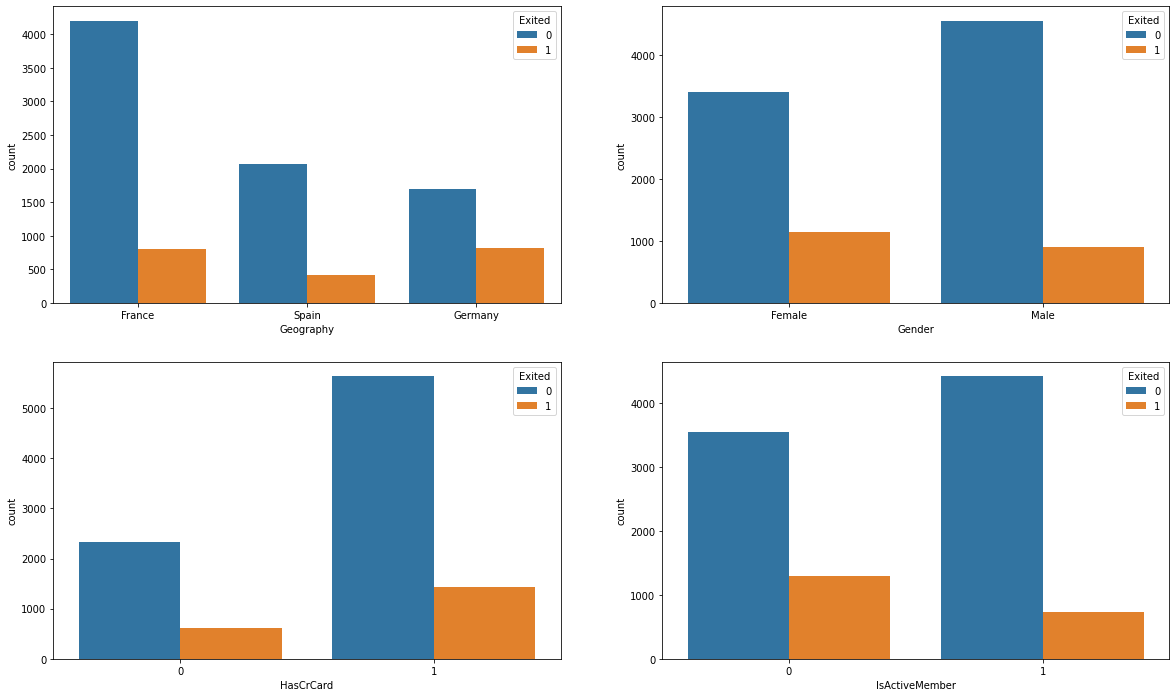

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

setelah dilakukan multivariate analisis tidak ditemukan hubungan yang signifikan pada mayoritas 
perbandingan feature. dapat dilihat dari heatmap, data yang nilai pengaruhnya paling besar adalah age(umur)
dengan exited(tutup rekening) yang bernilai 0.29 sedangkan rata rata korelasinya tidak lebih dari 0.09<br>di luar terhadap target, nilai korelasi Balance dan Number of Products juga lebih besar dibanding yang lain dan sifatnya berlawanan, namun tidak begitu besar signifikannya dengan nilai -0.30

## **No 4**

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

Text(0.5, 0, 'Total Nasabah ')

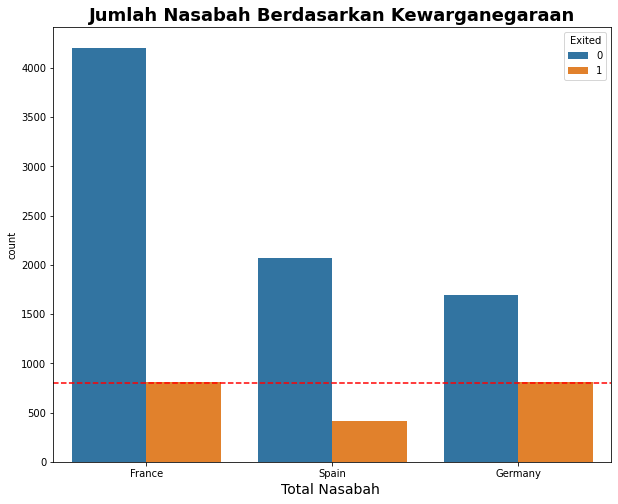

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.axhline(y=800, linestyle='--', color='red')

plt.title('Jumlah Nasabah Berdasarkan Kewarganegaraan', fontsize=18, fontweight='bold')
plt.xlabel('Total Nasabah ', fontsize=14)

Dari visualisasi di atas dapat disimpulkan bahwa negara france dan Germany memiliki tingkat Churn yang sama dan negara Spain adalah negara dengan tingkat churn paling rendah, rekomendasi bisnis yang mungkin dapat di berikan adalah memberikan perlakuan khusu seperti customer engagement atau menawakan keuntungan jakngka panjang seperti membership program kepada France dan Germany

In [33]:
df['tenure_group'] = np.where(df['Tenure'] > 7, 'High', 
                                             np.where(df['Tenure'] > 4, 'Mid', 'Low'))
df_group = df.groupby(['tenure_group'])['CustomerId'].nunique().reset_index(name='unique_customer')
df_group.sort_values('unique_customer', ascending=False)

,tenure_group,unique_customer
1,Low,4494
2,Mid,3007
0,High,2499


Text(0.5, 1.0, 'Number of Customer by Tenure Group')

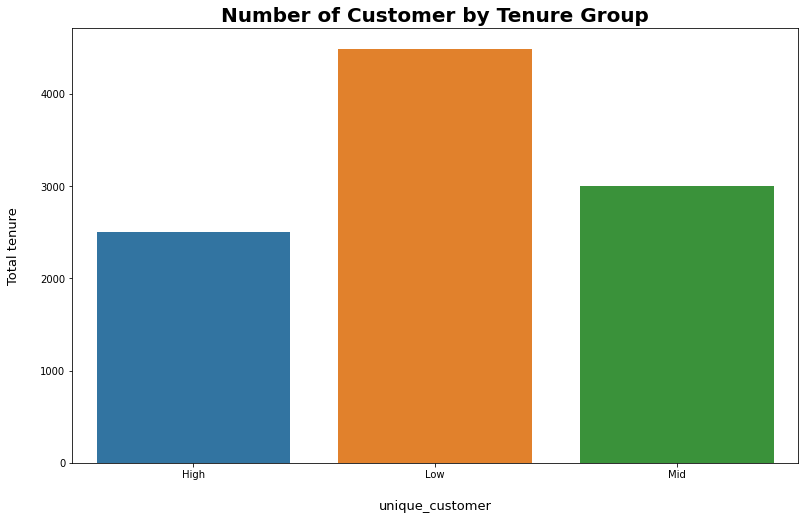

In [34]:
plt.figure(figsize = (13,8))
sns.barplot(x='tenure_group',
            y='unique_customer',
            data=df_group)

plt.ylabel('Total tenure', fontsize = 13, labelpad = 20)
plt.xlabel('unique_customer', fontsize = 13, labelpad = 20)
plt.title('Number of Customer by Tenure Group',
          fontweight='bold',
          fontsize = 20)

Dari visualisasi di atas dapat disimpulkan bahwa nasabah dengan masa tenure low lebih banyak atau kebanyakan nasabah bank mimiliki tenure kurang dari 4 tahun, rekomendasi bisnis yang mungkin di berikan adlah memberikan riward kepada nasabah dengan masa tenure tertentu agar supaya nasabah tetap bertahan dan tidak jdi churn.

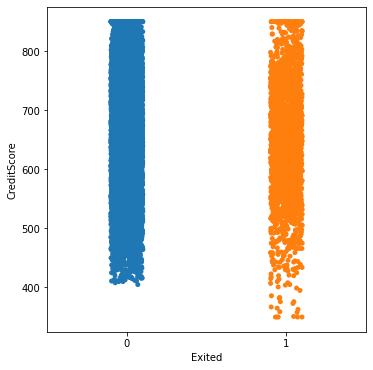

In [35]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
sns.stripplot(ax=ax, data=df, x='Exited', y='CreditScore') # gambar catplot/stripplotnya
plt.tight_layout()

Dari visualisasi di atas dapat disimpulkan bahwa nasabah yang memiliki credit score dibawah 400 akan cenderung melakukan churn, oleh karena itu kita dapat memperingati kepada perusahaan jika ada nasabah yang akan hit credit scorenya menjadi 400 kebawah, maka potensi churnnya akan lebih besar. Sehingga pihak bank dapat melakukan tindakan persuasi kepada nasabah tersebut seperti memberikan promo menarik.

# Data cleansing

In [36]:
dfa = pd.read_csv("Churn_Modelling.csv") #dfa (data frame untuk cleansing)

#**Handle Mising Value**

In [37]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
dfa.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#**Handle Duplicates Data**

In [39]:
dfa.duplicated().sum()

0

#**Handle Outliers**

In [ ]:
# menghilangkan outliers dengan IQR

In [40]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(dfa)}')

filtered_entries = np.array([True] * len(dfa))

for col in ['CreditScore','Age','Tenure','Balance','EstimatedSalary']:

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      low_limit = Q1 - (IQR * 1.5)
      high_limit = Q3 + (IQR * 1.5)

      filtered_entries = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & filtered_entries

dfa = dfa[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfa)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9626


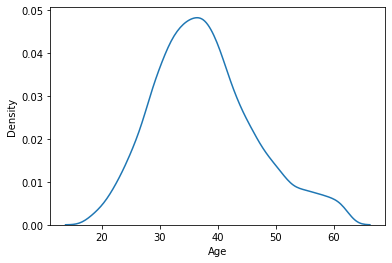

In [41]:
sns.kdeplot(dfa['Age'])

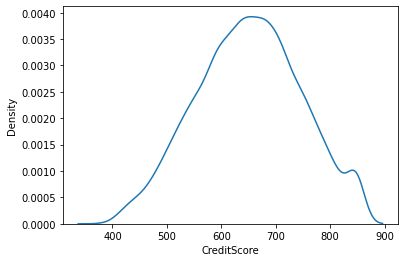

In [42]:
sns.kdeplot(dfa['CreditScore'])

#**Feature Encoding**

In [43]:
# label
mapping_jenis_kelamin = {
    'Male' : 0,
    'Female' : 1
}

In [44]:
dfa['jenis_kelamin'] = dfa['Gender'].map(mapping_jenis_kelamin)

In [45]:
# OHE
for cat in ['Geography']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dfa = dfa.join(onehots)

#**Feature Transformation**

In [46]:
# sebelum dilakukan transformasi dilakukan split terlebih dahulu
# split yang dilakukan langsung memisah kan featur dan target

X = dfa.drop(columns=['RowNumber','CustomerId', 'Surname','Gender','Geography','Exited' ])
y = dfa[['Exited']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# transformasi data dengan standarisasi
# karena semuah fitur righ-skeww ada di vaibel x maka dilakukan standarisasi pada vaibel x
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

#**Feature Imbalance**

In [48]:
# featur dan target
x = X_train.values # menggunalan x kecil
y = y_train['Exited'].values # menggunalan y kecil

print(x.shape)
print(y.shape)

(6738, 12)
(6738,)


In [49]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [50]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    5416
1    1322
dtype: int64


UNDERSAMPLING
0    2644
1    1322
dtype: int64


OVERSAMPLING
0    5416
1    2708
dtype: int64


SMOTE
0    5416
1    2708
dtype: int64


catatatan mengenai data cleansing ada di file asli final project (Final Project - Boba Warriors.ipynb)

# FEATURE ENGINEERING

a. Feature Selection (membuang feature yang kurang relevan atau redundan)

b. Feature Extraction (membuat feature baru dari feature yang sudah ada)

c. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus

In [51]:
dfa.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jenis_kelamin,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


In [52]:
#menghapus kolom yang tidak dibutuhkan pada data set
dfa = dfa.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [53]:
dfa.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jenis_kelamin,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


### 4 Fitur Tambahan yang tidak digunakan pada saat melakukan modeling

In [54]:
dfa["CreditsScore"] = pd.qcut(dfa['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
dfa.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jenis_kelamin,Geography_France,Geography_Germany,Geography_Spain,CreditsScore
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0,5
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,6


In [55]:
dfa["AgeScore"] = pd.qcut(dfa['Age'], 5, labels = [1, 2, 3, 4, 5])
dfa.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jenis_kelamin,Geography_France,Geography_Germany,Geography_Spain,CreditsScore,AgeScore
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0,3,4
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,2,4
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0,1,4
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0,5,3
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,6,4


In [56]:
dfa["TenureScore"] = pd.qcut(dfa['Tenure'], 5, labels = [1, 2, 3, 4, 5])
dfa.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jenis_kelamin,Geography_France,Geography_Germany,Geography_Spain,CreditsScore,AgeScore,TenureScore
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0,3,4,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,2,4,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0,1,4,4
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0,5,3,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,6,4,1


**FEATURE ENGINEERING**
#ini hanya asumsi beberapa hal tidak di lakukan untuk menghemat waktu##

1. membuang kolom 'RowNumber','CustomerId', 'Surname', karena tidak dipakai, dan setelah di lakukan encoding kolom ini sudah tidak relevan  ini dilakukan pada saat split data 
2. proses encoding menghailkan bebrapa fitur baru untuk penyesuaiaan diataranya kolom jenis_kelamin, Geography_France,	Geography_Germany	dan Geography_Spain
3. terdapat beberapa fitur tambahan, namun tambahan fitur tidak digunakan, karena pada prosesnya menggunakan fitur yang sudah ada


# Modeling

# preparation

In [57]:
#Preparation
import warnings
warnings.filterwarnings('ignore')

In [58]:
#train test di cross vali dation pake ROC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE) #X_smote
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE) # X_smote
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1])) #y_smote

    #  
    score = cross_validate(logreg, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [59]:
#ini train test pake ROC

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_over_SMOTE, y_over_SMOTE)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_over_SMOTE)
        train_auc = roc_auc_score(y_over_SMOTE, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

##**Modeling**

## **Logistic Regression**

In [ ]:
#Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_over_SMOTE, y_over_SMOTE) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.55
Recall (Test Set): 0.51
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.79
roc_auc (crossval train): 0.7928327414507632
roc_auc (crossval test): 0.7919304801237423


In [62]:
from sklearn.metrics import classification_report

logreg = LogisticRegression() # inisiasi object dengan nama logreg

logreg.fit(X_over_SMOTE, y_over_SMOTE) # fit model regression dari data train

predictions = logreg.predict(X_test)

#print report classification
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2261
           1       0.55      0.51      0.53       627

    accuracy                           0.80      2888
   macro avg       0.71      0.70      0.70      2888
weighted avg       0.80      0.80      0.80      2888



roc antara data train dan test tidak jauh. model tidak overfit

**Hyperparameter Tuning**

In [63]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rs)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.56
Recall (Test Set): 0.50
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.79
roc_auc (crossval train): 0.7928327414507632
roc_auc (crossval test): 0.7919304801237423


**Check the best hyperparameter after tuning**

In [64]:
show_best_hyperparameter(rs)

{'C': 0.014717171717171717, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Feature Importance

In [65]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'jenis_kelamin',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [66]:
rs.best_estimator_.coef_

array([[-0.02466954,  0.93020156, -0.04061323,  0.19650959, -0.0861035 ,
        -0.00801093, -0.39738212,  0.03494278,  0.19579549, -0.0954245 ,
         0.21387278, -0.10682462]])

**Learning Curve**

param value: 0.0001; train: 0.7826255130048503; test: 0.7842777503849689
param value: 0.0006040404040404041; train: 0.7904032229031984; test: 0.7935882486966077
param value: 0.0011080808080808082; train: 0.7917807131994701; test: 0.7953552612180607
param value: 0.0016121212121212123; train: 0.7922593540884386; test: 0.7960458421595785
param value: 0.002116161616161616; train: 0.7924543559320925; test: 0.7963174189343327
param value: 0.0026202020202020205; train: 0.792574561614037; test: 0.7965607799402813
param value: 0.0031242424242424243; train: 0.7926449259156632; test: 0.7967350123126561
param value: 0.003628282828282828; train: 0.7926873354075349; test: 0.7968281243497147
param value: 0.004132323232323233; train: 0.7927210175441659; test: 0.7969170040214525
param value: 0.004636363636363637; train: 0.7927452223184656; test: 0.7969988297509889
param value: 0.0051404040404040416; train: 0.7927573587968468; test: 0.7970594936539208
param value: 0.005644444444444445; train: 0.79277883

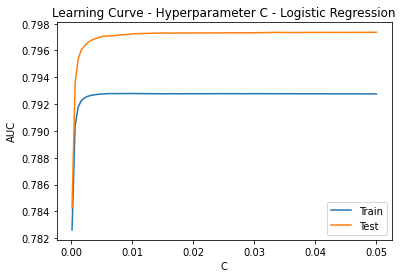

In [67]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

# k-Nearest Neighbor

### Fit Model

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_over_SMOTE, y_over_SMOTE) # fit model KNN dari data train

KNeighborsClassifier()

In [ ]:
# evaluasi
eval_classification(knn)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.54
Recall (Test Set): 0.56
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.7895044366618196
roc_auc (crossval test): 0.7880608135373062


In [ ]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier() # inisiasi object dengan nama knn

knn.fit(X_over_SMOTE, y_over_SMOTE) # fit model KNN dari data train

predictions = knn.predict(X_test)

#print report classification
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2261
           1       0.54      0.56      0.55       627

    accuracy                           0.80      2888
   macro avg       0.71      0.71      0.71      2888
weighted avg       0.80      0.80      0.80      2888



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_over_SMOTE, y_over_SMOTE)
rdm = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rdm.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rdm)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.53
Recall (Test Set): 0.53
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.7895044366618196
roc_auc (crossval test): 0.7880608135373062


param value: 1; train: 1.0; test: 0.6810006299170385
param value: 2; train: 0.9916614211625274; test: 0.733531690188037
param value: 3; train: 0.9785917635039459; test: 0.759050384192962
param value: 4; train: 0.966023826497996; test: 0.7775140779051484
param value: 5; train: 0.9576067014633592; test: 0.7897442028939503
param value: 6; train: 0.9490778594633985; test: 0.7960885185098969
param value: 7; train: 0.9415597202009911; test: 0.8027481453422466
param value: 8; train: 0.9353229680535161; test: 0.8078146393284082
param value: 9; train: 0.9299646105745; test: 0.8131068594650149
param value: 10; train: 0.9264473159564418; test: 0.8142852205097602
param value: 11; train: 0.9227974405394379; test: 0.8165512994419627
param value: 12; train: 0.9185446957862148; test: 0.818231195777228
param value: 13; train: 0.9141894387001477; test: 0.8190445153130503
param value: 14; train: 0.9110376361740148; test: 0.8213825444557072
param value: 15; train: 0.9075143755904601; test: 0.8238457810724

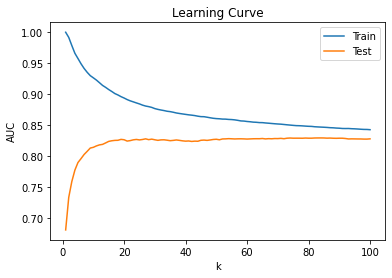

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_over_SMOTE, y_over_SMOTE)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_over_SMOTE)
        train_auc = roc_auc_score(y_over_SMOTE, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

# Decision tree





In [68]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_over_SMOTE, y_over_SMOTE) # fit model decision tree dari data train

# evaluasi
eval_classification(dt)


Accuracy (Test Set): 0.77
Precision (Test Set): 0.47
Recall (Test Set): 0.52
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.68
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.7928327414507632
roc_auc (crossval test): 0.7919304801237423


# **Hyperparameter Tuning**

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.50
Recall (Test Set): 0.54
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.70
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.7928327414507632
roc_auc (crossval test): 0.7919304801237423


# **Feature Importance**

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_over_SMOTE, y_over_SMOTE) # fit model decision tree dari data train

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.10780055, 0.27368248, 0.07966649, 0.14585651, 0.17973484,
       0.01285697, 0.02993225, 0.11610118, 0.01629042, 0.00756049,
       0.0246859 , 0.00583193])

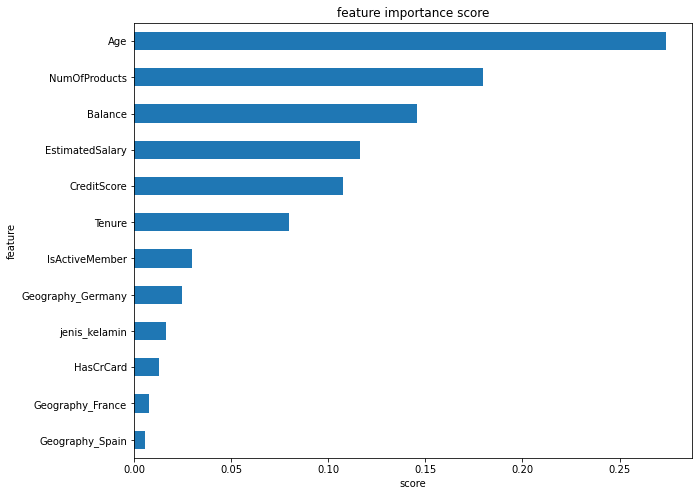

In [ ]:
show_feature_importance(dt)